# 2.0 Import world happiness data and packages

In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [575]:
# Import world happiness report 2021 data

whr_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [576]:
# Import World happiness report data - Historical

whr_historical = pd.read_csv('world-happiness-report.csv')

## 2.0.1 Info on where to find data definitions

### The data definition for the following metrics found in the two world happiness report data sets can be found in the same github repo as this jupyter notebook. The name of the file is 'Appendix1WHR2021C2'

 * Ladder Score
 * Logged GDP per capita
 * Social support
 * Health life expectancy
 * Freedom to make life choices
 * Generosity
 * Perceptions of corruption
 * Ladder score in Dystopia

# 2.1 Data exploration of World Happiness Report data

## 2.1.1 Check info for dataset

There does not appear to be any missing data in this data set. The target variable for our model will be the Ladder score which is the Happiness score defined as:

 * Happiness score or subjective well-being (variable name ladder): The survey measure of SWB is from the Feb 26, 2021 release of the Gallup World Poll (GWP) covering years from 2005 to 2020. Unless stated otherwise, it is the na- tional average response to the question of life evaluations. The English wording of the question is “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” This measure is also referred to as Cantril life ladder, or just life ladder in our analysis.
 
The report covers 149 countries which have a Happiness score. We will focus on these countries

In [577]:
# Explore the whr_2021 dataset

whr_2021.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

## 2.1.2 Filter WHR 2021 dataset for feature columns

Need to exclude columns with the word 'Explained' in it, as these are not features. They appear to be model results.

In [578]:
whr_2021_filt = whr_2021.loc[:, ['Country name','Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
whr_2021_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


## 2.1.3 Obtain summary statistics on numeric variables and plot histogram

In [579]:
whr_2021_filt.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


array([[<AxesSubplot:title={'center':'Ladder score'}>,
        <AxesSubplot:title={'center':'Logged GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>],
       [<AxesSubplot:title={'center':'Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

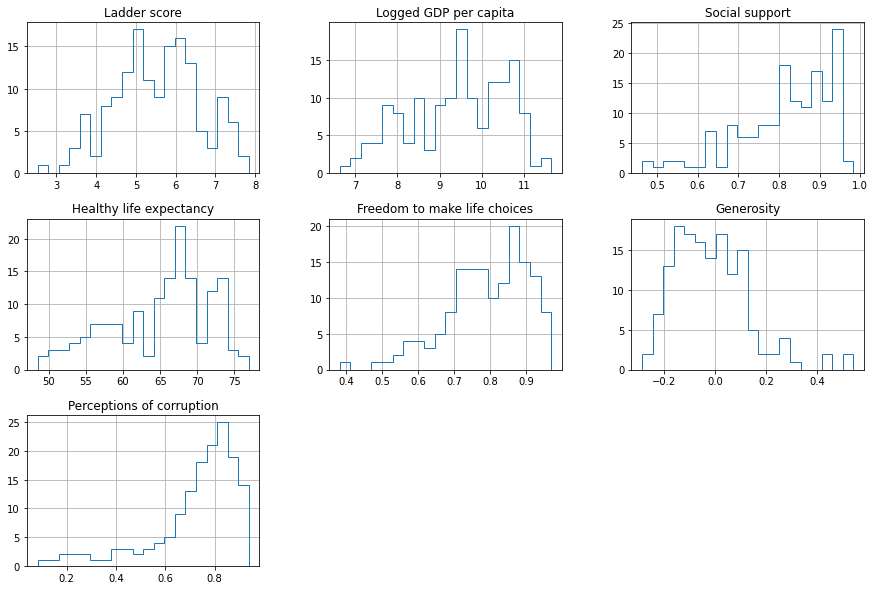

In [580]:
whr_2021_filt.hist(bins = 20, histtype='step', figsize = (15,10))

Ladder score (Happiness Score) appears to be normally distributed. Same with Logged GDP per capita. The other variables appear to have skew. Need to look into how to address this.

## 2.1.4 Additional analysis on filtered WHR dataset

In [581]:
whr_2021_filt.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [582]:
# Country name is unique

whr_2021_filt['Country name'].value_counts().max()

1

In [583]:
# Another way to verify that we have 149 unique country names

len(whr_2021_filt['Country name'].unique()) == len(whr_2021_filt['Country name'])

True

Country name appears to be unique.

Below we can see the distribution of countries across region. This might be useful later

In [584]:
# count unique values of Regioal indicator

whr_2021_filt['Regional indicator'].value_counts()

Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

# 2.2 Importing third party datasets

## 2.2.0 Questions we have around world happiness

We have 7 variables that are continous. Upon inspecting, it appears that this is the correct data type for these variables

### Additional datasets

In addition to these 7 variables found in the world happiness report, we would like to include data from other sources to see if it can help explain and predict the Happiness score.

Questions we have are:

1. Does income inequality impact the happiness score? Added column 'gini'
2. Does income per capital have an impact on happiness score? Can money buy happiness?
3. Does Fertility impact the happiness score? does having more or less kids make a society happier?
4. Does child mortality explain a country's happiness score?
5. Does labour force participation impact happiness score?

We use data from gapminder.org to enhance our data set to answer these questions

## 2.2.1 Income inequality: Gini dataset


### 1. Does income inequality impact happiness score? add gini data

description:Gini shows income inequality in a society. A higher number means more inequality.
source_url:http://gapm.io/ddgini

### 2.2.1.1 Import gini dataset and conduct summary analysis

In [585]:
gini = pd.read_csv('gini.csv')

In [586]:
# Data with gini index which measures income inequality in a country

gini.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
1,Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
2,Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
3,Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
4,United Arab Emirates,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0


In [587]:
missing_gini_data = pd.concat([gini.isnull().sum(axis=1), 100 * gini.isnull().mean(axis=1)], axis=1)
missing_gini_data.columns = ['count', '%']
missing_gini_data.sort_values(by = 'count', ascending=False).head()

,count,%
0,0,0.0
146,0,0.0
124,0,0.0
125,0,0.0
126,0,0.0


There is no missing data in the gini datset

In [588]:
# get summary statistics from gini

gini['2020'].describe()

count    195.000000
mean      38.850769
std        7.378433
min       25.000000
25%       33.500000
50%       39.100000
75%       42.750000
max       63.000000
Name: 2020, dtype: float64

In [589]:
# get info on gini dataset
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 242 entries, country to 2039
dtypes: float64(241), object(1)
memory usage: 368.8+ KB


### 2.2.1.2 Merge gini dataset onto world happiness report dataset

In [590]:
index_master = whr_2021_filt.loc[:,'Country name']
gini_index = gini.loc[:, ['country']]

In [591]:
merged_index = pd.merge(index_master, gini_index, left_on= 'Country name', right_on = 'country', how='left')

We can see below the rows that didn't carry over from the gini datset. We need to verify that these values in Country Name indeed do not exist in the gini dataset. For Taiwan and Hong Kong it would make sense that it is not part of the gini dataset as classifying these territories as countries is a contentious issue and as a result they may not have gini data on them.

In [592]:
# find values that didn't carry over to the world happiness report dataset

merged_index.loc[merged_index.country.isnull(), :]

,Country name,country
23,Taiwan Province of China,NaN
32,Kosovo,NaN
33,Slovakia,NaN
66,Kyrgyzstan,NaN
73,North Cyprus,NaN
76,Hong Kong S.A.R. of China,NaN
82,Congo (Brazzaville),NaN
84,Ivory Coast,NaN
99,Laos,NaN
124,Palestinian Territories,NaN


### 2.2.1.3 Check if these countries exist in gini dataset. 

This is a manual way as we check each country individually. Look for a better way to do this.

In [593]:
# Taiwan doesn't exist in the gini dataset

gini_index['country'].str.contains('Taiwan').sum()

0

In [594]:
# Kosovo doesn't exist in the gini dataset

gini_index['country'].str.contains('Kosovo').sum()

0

In [595]:
# Kyrgystan doesn't exist in the gini dataset

gini_index['country'].str.contains('Kyrgystan').sum()

0

In [596]:
# Hong Kong doesn't exist in the gini datset

gini_index['country'].str.contains('Hong Kong').sum()

0

In [597]:
# Ivory Coast doesn't exist in the gini dataset

gini_index['country'].str.contains('Ivory').sum()

0

In [598]:
# Laos doesn't exist in the gini dataset

gini_index['country'].str.contains('Laos').sum()

0

In [599]:
# Swaziland doesn't exist in the gini dataset

gini_index['country'].str.contains('swazi').sum()

0

In [600]:
# Palestinian Territories exists in the gini dataset

gini_index['country'].str.contains('Palestin').sum()

1

In [601]:
# show line in gini data with Palestine

gini_index.loc[gini_index['country'].str.contains('Palestin'),:]

,country
145,Palestine


In [602]:
# replace Palestine with Palestinian Territories in the gini dataset

gini_index.country.replace({"Palestine : Palestinian Territories"})

0               Afghanistan
1                    Angola
2                   Albania
3                   Andorra
4      United Arab Emirates
               ...         
190                   Samoa
191                   Yemen
192            South Africa
193                  Zambia
194                Zimbabwe
Name: country, Length: 195, dtype: object

In [603]:
# Congo exists in the gini dataset

gini_index['country'].str.contains('Congo').sum()

2

In [604]:
# Show rows with Congo

gini_index.loc[gini_index['country'].str.contains('Congo'),:]

,country
35,"Congo, Dem. Rep."
36,"Congo, Rep."


We find that Palestine and Congo, Rep. does exist in gini dataset. Congo (Brazzaville) is equivalent to Congo, Rep. according to [wikipedia](https://en.wikipedia.org/wiki/Republic_of_the_Congo)

### 2.2.1.4 Fix country name for Congo and Palestine

In [605]:
# Create replicate of gini dataset for cleaning

gini_clean = gini

In [669]:
# fixed name for Congo and Palestine to match world happiness report country name

gini_clean['country'] = gini_test.country.replace({'Congo, Rep.' : 'Congo (Brazzaville)'})
gini_clean['country'] = gini_test.country.replace({'Palestine' : 'Palestinian Territories'})

In [670]:
# confirm change

searchfor = ['Congo', 'Palest']

gini_clean.loc[gini_test.country.str.contains('|'.join(searchfor))]

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
35,"Congo, Dem. Rep.",40.4,40.4,40.4,40.4,40.4,40.4,40.4,40.4,40.4,...,42.1,42.1,42.1,42.1,42.1,42.1,42.1,42.1,42.1,42.1
36,Congo (Brazzaville),56.4,56.4,56.4,56.4,56.4,56.4,56.4,56.4,56.4,...,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.9,48.9
145,Palestinian Territories,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7


### 2.2.1.5 Merge clean gini data with world happiness report

We only bring over the data for 2020 for now. Although we know that if we need to bring data for additional years, it is possible

In [671]:
# filter gini_clean for 2020 data.

gini_2021 = gini_clean.loc[:, ['country', '2020']]
gini_2021.head()

,country,2020
0,Afghanistan,36.8
1,Angola,42.6
2,Albania,29.0
3,Andorra,40.0
4,United Arab Emirates,40.0


In [672]:
# Join WHR 2021 data with new gini dataset

whr2021_gini = pd.merge(whr_2021_filt, gini_2021, left_on= 'Country name', right_on = 'country', how='left').drop(['country'], axis=1).rename(columns = {'2020' : 'gini'})

In [610]:
whr2021_gini

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,27.1
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,28.2
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,32.3
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,27.8
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,28.2
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,54.2
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,60.5
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,45.1
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,43.2


In [673]:
# Check that the rows with missing gini values are as expected.

whr2021_gini.loc[whr2021_gini.gini.isnull(), :]

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini
23,Taiwan Province of China,East Asia,6.584,10.871,0.898,69.600,0.784,-0.070,0.721,NaN
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917,NaN
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911,NaN
66,Kyrgyzstan,Commonwealth of Independent States,5.744,8.538,0.893,64.401,0.935,0.119,0.908,NaN
73,North Cyprus,Western Europe,5.536,10.576,0.820,73.898,0.795,0.012,0.626,NaN
76,Hong Kong S.A.R. of China,East Asia,5.477,11.000,0.836,76.820,0.717,0.067,0.403,NaN
84,Ivory Coast,Sub-Saharan Africa,5.306,8.551,0.644,50.114,0.741,-0.016,0.794,NaN
99,Laos,Southeast Asia,5.030,8.947,0.728,58.968,0.910,0.123,0.658,NaN
129,Swaziland,Sub-Saharan Africa,4.308,9.065,0.770,50.833,0.647,-0.185,0.708,NaN


In [674]:
# remove countries with no gini data from whr_2021 data

whr2021_clean = whr2021_gini.loc[~whr2021_gini.gini.isnull(), :]
whr2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 148
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.0+ KB


## 2.2.2 Income per capita dataset


### 2. Does income per capital have an impact on happiness score? Can money buy happiness? Add income per capita data

description:Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).
source:Gapminder based on World Bank, A. Maddison, M. Lindgren, IMF & more.
source_url:http://gapm.io/dgdppc

### 2.2.2.1 Import data and conduct analysis for income per capita

In [741]:
income_per_capita = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [742]:
income_per_capita.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310
2,Albania,667,667,667,667,667,668,668,668,668,...,19.4k,19.8k,20.2k,20.6k,21k,21.5k,21.9k,22.3k,22.8k,23.3k
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73.6k,75.1k,76.7k,78.3k,79.8k,81.5k,83.1k,84.8k,86.5k,88.3k
4,United Arab Emirates,998,1000,1010,1010,1010,1020,1020,1020,1030,...,66.8k,68.1k,69.4k,70.8k,72.2k,73.7k,75.2k,76.7k,78.3k,79.9k


In [743]:
income_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 242 entries, country to 2039
dtypes: int64(85), object(157)
memory usage: 368.8+ KB


There doesn't appear to be any missing data but lets verify like we did with the gini

In [744]:
missing_income_data = pd.concat([income_per_capita.isnull().sum(axis=1), 100 * income_per_capita.isnull().mean(axis=1)], axis=1)
missing_income_data.columns = ['count', '%']
missing_income_data.sort_values(by = 'count', ascending=False).head()

,count,%
0,0,0.0
146,0,0.0
124,0,0.0
125,0,0.0
126,0,0.0


### 2.2.2.2 Merge whr2021_clean dataset with income dataset

In [745]:
income_filtered = income_per_capita.loc[:, ['country', '2020']]

We can see here that similar to gini, we do not have missing data by rows for the income per capital dataset. Since we got both gini and income per capita data from gapminder.org, it appears that this source has some clean data

In [746]:
whr2021_gini_income = pd.merge(whr2021_clean, income_filtered, left_on = 'Country name', right_on = 'country', how='left' )

In [747]:
whr2021_gini_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
 10  country                       138 non-null    object 
 11  2020                          138 non-null    object 
dtypes: float64(8), object(4)
memory usage: 14.2+ KB


There appears to be 2 missing values that didn't carry over from the income dataset, and it looks like it's the usual culprit.

In [748]:
whr2021_gini_income.loc[whr2021_gini_income['2020'].isnull(), :]

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,country,2020
76,Congo (Brazzaville),Sub-Saharan Africa,5.342,8.117,0.636,58.221,0.695,-0.068,0.745,48.9,NaN,NaN
116,Palestinian Territories,Middle East and North Africa,4.517,8.485,0.826,62.250,0.653,-0.163,0.821,33.7,NaN,NaN


### 2.2.2.3 Fix country name for Congo (Brazzaville) and Palestinian Territories in the Income dataset

Fix the data in the income dataset and redo the merge

In [749]:
income_filtered['country'] = income_filtered.country.replace({'Congo, Rep.' : 'Congo (Brazzaville)'})
income_filtered['country'] = income_filtered.country.replace({'Palestine' : 'Palestinian Territories'})

In [750]:
whr2021_gini_income_clean = pd.merge(whr2021_clean, income_filtered, left_on = 'Country name', right_on = 'country', how='left' ).drop(columns='country').rename(columns = {'2020':'income_per_capita'})

In [751]:
whr2021_gini_income_clean.loc[whr2021_gini_income_clean['income_per_capita'].isnull(), :]

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita


### 2.2.2.4 Income Per capita data type fix

income_per_capita appears to be an object. Certain values has the letter k to indicate thousands in the income per capita data. We need to remove the K and convert these into values into thousands by multiplying by 1000

In [752]:
whr2021_gini_income_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
 10  income_per_capita             140 non-null    object 
dtypes: float64(8), object(3)
memory usage: 13.1+ KB


In [753]:
whr2021_gini_income_clean.income_per_capita.value_counts()

3150     2
2580     2
47.8k    2
18.3k    2
5080     2
        ..
27.2k    1
26.6k    1
31.7k    1
23.8k    1
1850     1
Name: income_per_capita, Length: 133, dtype: int64

In [754]:
whr2021_gini_income_clean[whr2021_gini_income_clean.income_per_capita.str.contains('k|K')]

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,27.1,43.5k
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,28.2,49.5k
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,32.3,59.3k
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,27.8,47.8k
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,28.2,51.8k
...,...,...,...,...,...,...,...,...,...,...,...
113,Tunisia,Middle East and North Africa,4.596,9.266,0.691,67.201,0.656,-0.201,0.870,35.8,11.5k
114,Lebanon,Middle East and North Africa,4.584,9.626,0.848,67.355,0.525,-0.073,0.898,31.8,12.3k
120,Sri Lanka,South Asia,4.325,9.470,0.827,67.299,0.841,0.079,0.863,39.8,12.8k
122,Egypt,Middle East and North Africa,4.283,9.367,0.750,61.998,0.749,-0.182,0.795,31.8,12.2k


In [771]:
dirty_income = whr2021_gini_income_clean.income_per_capita

In [772]:
type(dirty_income)

pandas.core.series.Series

In [776]:
dirty_income

0      43.5k
1      49.5k
2      59.3k
3      47.8k
4      51.8k
       ...  
135     2970
136    17.9k
137     2360
138     2420
139     1850
Name: income_per_capita, Length: 140, dtype: object

In [777]:
# remove the values with k and replace with three zeroes and also identify indices that contained k for mask

nok_income = dirty_income.str.replace('k', '')
mask = dirty_income.str.contains('k')

In [778]:
# after removing k, convert object to float
nok_income = nok_income.astype(float)
nok_income[mask].describe()

count    85.000000
mean     30.808235
std      18.361562
min      10.100000
25%      16.200000
50%      26.600000
75%      41.100000
max      95.800000
Name: income_per_capita, dtype: float64

In [779]:
# multiply nok_income by 1000

nok_income[mask] = nok_income[mask] * 1000
nok_income[mask]

0      43500.0
1      49500.0
2      59300.0
3      47800.0
4      51800.0
        ...   
113    11500.0
114    12300.0
120    12800.0
122    12200.0
136    17900.0
Name: income_per_capita, Length: 85, dtype: float64

In [783]:
nok_income.sort_values(ascending=False)

7      95800.0
30     91400.0
14     75700.0
5      68200.0
23     65100.0
        ...   
134     1240.0
106     1220.0
111     1110.0
88       991.0
130      613.0
Name: income_per_capita, Length: 140, dtype: float64

In [784]:
# check distribution again to see if it's accurate
nok_income.describe()

count      140.000000
mean     20392.242857
std      19374.211059
min        613.000000
25%       4707.500000
50%      14200.000000
75%      31625.000000
max      95800.000000
Name: income_per_capita, dtype: float64

In [785]:
# merge with whr2021_gini_income_clean data set to create whr2021_clean_v2

whr2021_clean_v2 = pd.concat([whr2021_gini_income_clean.drop(columns = 'income_per_capita'), nok_income], axis=1)

In [786]:
whr2021_clean_v2

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,27.1,43500.0
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,28.2,49500.0
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,32.3,59300.0
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,27.8,47800.0
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,28.2,51800.0
...,...,...,...,...,...,...,...,...,...,...,...
135,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,54.2,2970.0
136,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,60.5,17900.0
137,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,45.1,2360.0
138,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,43.2,2420.0


## 2.2.3 Fertility dataset


### 3. Does fertility impact happiness score? 

description:Total fertility rate. The number of children that would be born to each woman with prevailing age-specific fertility rates.
source_url:http://gapm.io/dtfr

### 2.2.3.1 Import fertility data and conduct initial analysis

In [787]:
fertility = pd.read_csv('children_per_woman_total_fertility.csv')

In [788]:
fertility.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [789]:
fertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 302 entries, country to 2099
dtypes: float64(301), object(1)
memory usage: 476.7+ KB


In [790]:
fertility['2020'].describe()

count    201.000000
mean       2.594179
std        1.176156
min        1.230000
25%        1.740000
50%        2.120000
75%        3.400000
max        6.930000
Name: 2020, dtype: float64

In [791]:
len(fertility.country.unique()) == len(fertility)

True

There are 202 unique countries in this data set. Does not appear to have any missing values

### 2.2.3.2 Check country names that need to be fixed and then merge with whr2021_v2 data

In [792]:
fertility_filtered = fertility.loc[:, ['country', '2020']]

In [793]:
fertility_filtered['country'] = fertility_filtered.country.replace({'Congo, Rep.' : 'Congo (Brazzaville)'})
fertility_filtered['country'] = fertility_filtered.country.replace({'Palestine' : 'Palestinian Territories'})

In [794]:
whr2021_clean_v3 = pd.merge(whr2021_clean_v2, fertility_filtered, left_on = 'Country name', right_on = 'country', how='left' ).drop(columns='country').rename(columns = {'2020':'fertility'})

In [795]:
whr2021_clean_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
 10  income_per_capita             140 non-null    float64
 11  fertility                     140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.2+ KB


In [796]:
whr2021_clean_v3.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita,fertility
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,27.1,43500.0,1.79
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,28.2,49500.0,1.78
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,32.3,59300.0,1.56
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,27.8,47800.0,1.89
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,28.2,51800.0,1.76


## 2.2.4 Child Mortality


### 4. Does child mortality impact happiness score?

description:Death of children under five years of age per 1,000 live births
source_url:http://gapm.io/du5mr

### 2.2.4.1 Import  child mortality data and conduct initial analysis

In [797]:
child_mort = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')

In [798]:
child_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2099
dtypes: float64(301), object(1)
memory usage: 464.9+ KB


In [799]:
child_mort.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [800]:
child_mort['2020'].describe()

count    197.000000
mean      25.485635
std       26.111475
min        1.520000
25%        6.330000
50%       15.000000
75%       37.300000
max      114.000000
Name: 2020, dtype: float64

In [801]:
len(child_mort.country.unique()) == len(child_mort)

True

country values are unique and there does not appear to be any missing values

### 2.2.4.2 Check country names that need to be fixed and then merge with whr2021_v3 data

In [802]:
child_mort_filtered = child_mort.loc[:, ['country', '2020']]

In [803]:
child_mort_filtered['country'] = child_mort_filtered.country.replace({'Congo, Rep.' : 'Congo (Brazzaville)'})
child_mort_filtered['country'] = child_mort_filtered.country.replace({'Palestine' : 'Palestinian Territories'})

In [804]:
whr2021_clean_v4 = pd.merge(whr2021_clean_v3, child_mort_filtered, left_on = 'Country name', right_on = 'country', how='left' ).drop(columns='country').rename(columns = {'2020':'child_mortality'})

In [805]:
whr2021_clean_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
 10  income_per_capita             140 non-null    float64
 11  fertility                     140 non-null    float64
 12  child_mortality               140 non-null    float64
dtypes: fl

In [806]:
whr2021_clean_v4.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita,fertility,child_mortality
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,27.1,43500.0,1.79,1.52
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,28.2,49500.0,1.78,3.85
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,32.3,59300.0,1.56,3.81
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,27.8,47800.0,1.89,1.85
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,28.2,51800.0,1.76,3.42


## 2.2.5 labor force participation rate dataset


### 5. Does labour force participation impact happiness score?

description:For age group 25-54, percentage of all labour to total population.
source_url:https://www.ilo.org/ilostat/

In [807]:
labor = pd.read_csv('aged_25_54_labour_force_participation_rate_percent.csv')

In [808]:
labor.head()

,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Afghanistan,56.6,56.8,57.0,57.2,57.3,57.4,57.3,57.2,57.1,...,60.1,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,59.9
1,Angola,91.1,91.1,91.2,91.3,91.3,91.3,91.3,91.3,91.4,...,91.4,91.4,91.4,91.4,91.4,91.4,91.4,91.4,91.4,91.4
2,Albania,77.9,78.3,78.3,78.1,77.8,77.5,77.5,77.9,78.0,...,80.2,80.2,80.1,80.1,80.0,80.0,80.0,80.1,80.1,80.1
3,United Arab Emirates,83.6,83.7,83.8,84.0,84.1,84.3,84.4,84.6,84.8,...,85.5,85.1,84.9,84.7,84.5,84.2,84.0,83.8,83.7,83.6
4,Argentina,77.8,78.2,78.7,79.1,79.4,79.6,79.9,80.3,80.5,...,80.6,80.6,80.6,80.6,80.6,80.6,80.5,80.5,80.5,80.5


In [809]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  189 non-null    object 
 1   1989     189 non-null    float64
 2   1990     189 non-null    float64
 3   1991     189 non-null    float64
 4   1992     189 non-null    float64
 5   1993     189 non-null    float64
 6   1994     189 non-null    float64
 7   1995     189 non-null    float64
 8   1996     189 non-null    float64
 9   1997     189 non-null    float64
 10  1998     189 non-null    float64
 11  1999     189 non-null    float64
 12  2000     189 non-null    float64
 13  2001     189 non-null    float64
 14  2002     189 non-null    float64
 15  2003     189 non-null    float64
 16  2004     189 non-null    float64
 17  2005     189 non-null    float64
 18  2006     189 non-null    float64
 19  2007     189 non-null    float64
 20  2008     189 non-null    float64
 21  2009     189 non

In [810]:
labor['2020'].describe()

count    189.000000
mean      80.311111
std       10.335460
min       41.400000
25%       76.000000
50%       82.700000
75%       87.600000
max       95.800000
Name: 2020, dtype: float64

In [811]:
len(labor.country.unique()) == len(labor)

True

country values are unqiue and there does not appear to be any missing values

### 2.2.5.2 Check country names that need to be fixed and then merge with whr2021_v4 data

In [812]:
labor_filtered = labor[['country', '2020']]

In [813]:
labor_filtered['country'] = labor_filtered.country.replace({'Congo, Rep.' : 'Congo (Brazzaville)', 'Palestine' : 'Palestinian Territories'})

/Users/davidlam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [814]:
whr2021_clean_v5 = pd.merge(whr2021_clean_v4, labor_filtered, left_on = 'Country name', right_on = 'country', how='left' ).drop(columns='country').rename(columns = {'2020':'labor_ppt_25-54'})

In [815]:
whr2021_clean_v5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
 10  income_per_capita             140 non-null    float64
 11  fertility                     140 non-null    float64
 12  child_mortality               140 non-null    float64
 13  labor

In [816]:
whr2021_clean_v5.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita,fertility,child_mortality,labor_ppt_25-54
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,27.1,43500.0,1.79,1.52,86.2
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,28.2,49500.0,1.78,3.85,87.2
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,32.3,59300.0,1.56,3.81,90.9
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,27.8,47800.0,1.89,1.85,90.9
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,28.2,51800.0,1.76,3.42,87.8


In [817]:
whr2021_clean_v5.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,gini,income_per_capita,fertility,child_mortality,labor_ppt_25-54
count,140.000000,140.000000,140.000000,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.526464,9.415457,0.814650,65.04485,0.791314,-0.017414,0.726743,38.032857,20392.242857,2.537286,23.774929,80.698571
std,1.094085,1.169013,0.116501,6.59677,0.114759,0.151638,0.180458,7.673063,19374.211059,1.181295,25.405694,10.099968
min,2.523000,6.635000,0.463000,48.47800,0.382000,-0.288000,0.082000,25.000000,613.000000,1.230000,1.520000,47.400000
25%,4.833000,8.521000,0.749000,59.92200,0.717750,-0.131500,0.671500,32.550000,4707.500000,1.685000,4.965000,76.375000
50%,5.505500,9.573000,0.832000,66.65150,0.806500,-0.039500,0.784000,36.600000,14200.000000,1.990000,13.100000,82.900000
75%,6.231000,10.391750,0.906500,69.60775,0.877500,0.077500,0.844250,42.725000,31625.000000,3.140000,35.875000,87.925000
max,7.842000,11.647000,0.983000,76.95300,0.970000,0.542000,0.939000,63.000000,95800.000000,6.930000,112.000000,95.800000


# 2.3 Export final wrangled data to csv

In [818]:
whr2021_clean_v5.to_csv(os.getcwd()+'/whr2021_clean_v5.csv',index=False)